In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv(r"C:\Users\Sidharth\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [9]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
attrition_counts=data1['Attrition'].value_counts(normalize='true')
overall_attrition_rate=attrition_counts['Yes']*100

In [4]:
demographics=['Age','Gender','Education','Department','JobRole']
attribution_by_demo=data1[data1['Attrition']=='Yes'][demographics+['Attrition']]

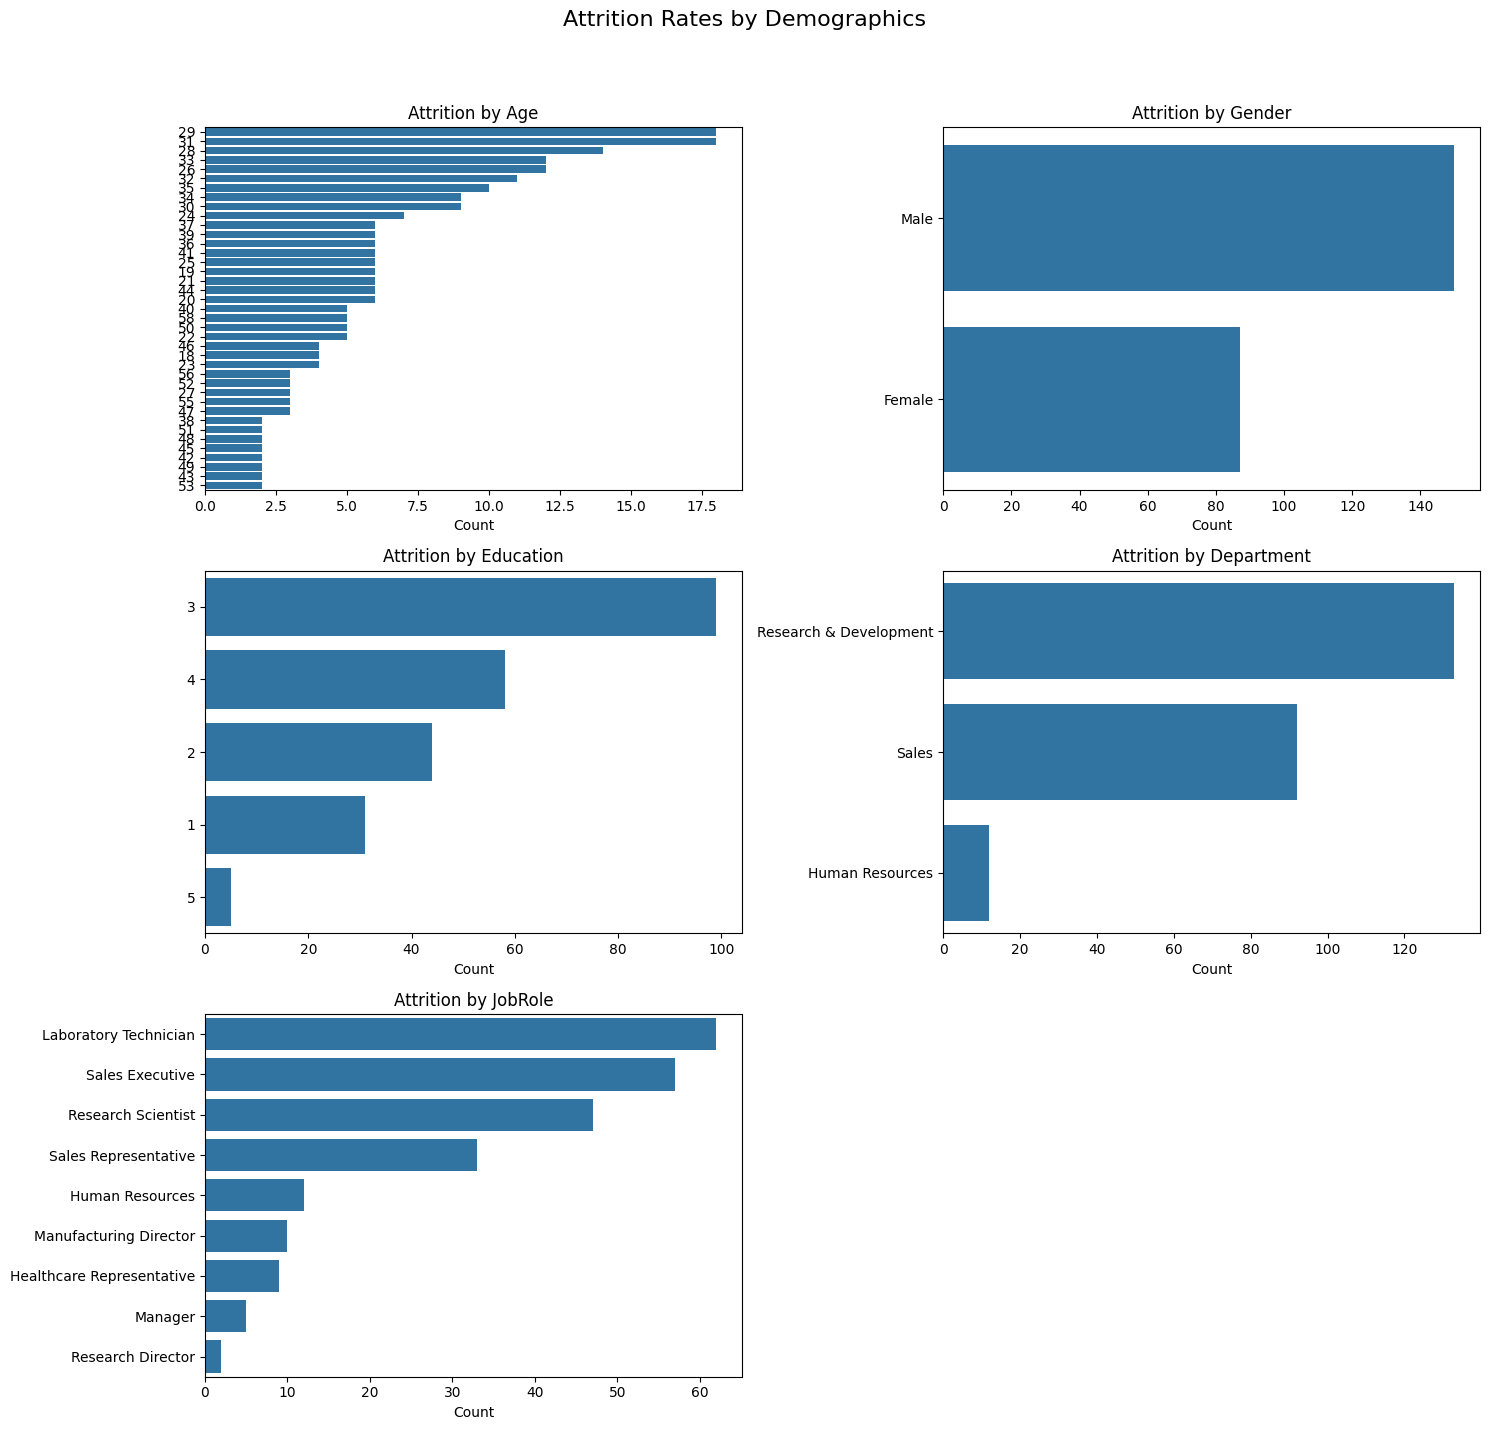

The overall attrition rate is approximately:16.12%


In [6]:
fig,axs=plt.subplots(3,2,figsize=(15,15))
fig.suptitle("Attrition Rates by Demographics",fontsize=16)

for i,demo in enumerate(demographics):
    sns.countplot(
        data=attribution_by_demo,
        y=demo,
        order=attribution_by_demo[demo].value_counts().index,
        ax=axs[i // 2, i% 2]
    )
    axs[i//2,i%2].set_title(f"Attrition by {demo}")
    axs[i//2,i%2].set_ylabel("")
    axs[i//2,i%2].set_xlabel("Count")

axs[2,1].axis("off")
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()
print(f"The overall attrition rate is approximately:{round(overall_attrition_rate,2)}%")

In [10]:
satisfaction_factors = ['JobInvolvement', 'JobSatisfaction', 'WorkLifeBalance']

salary_factors = ['MonthlyIncome', 'PercentSalaryHike']

benefit_factors = ['StockOptionLevel']

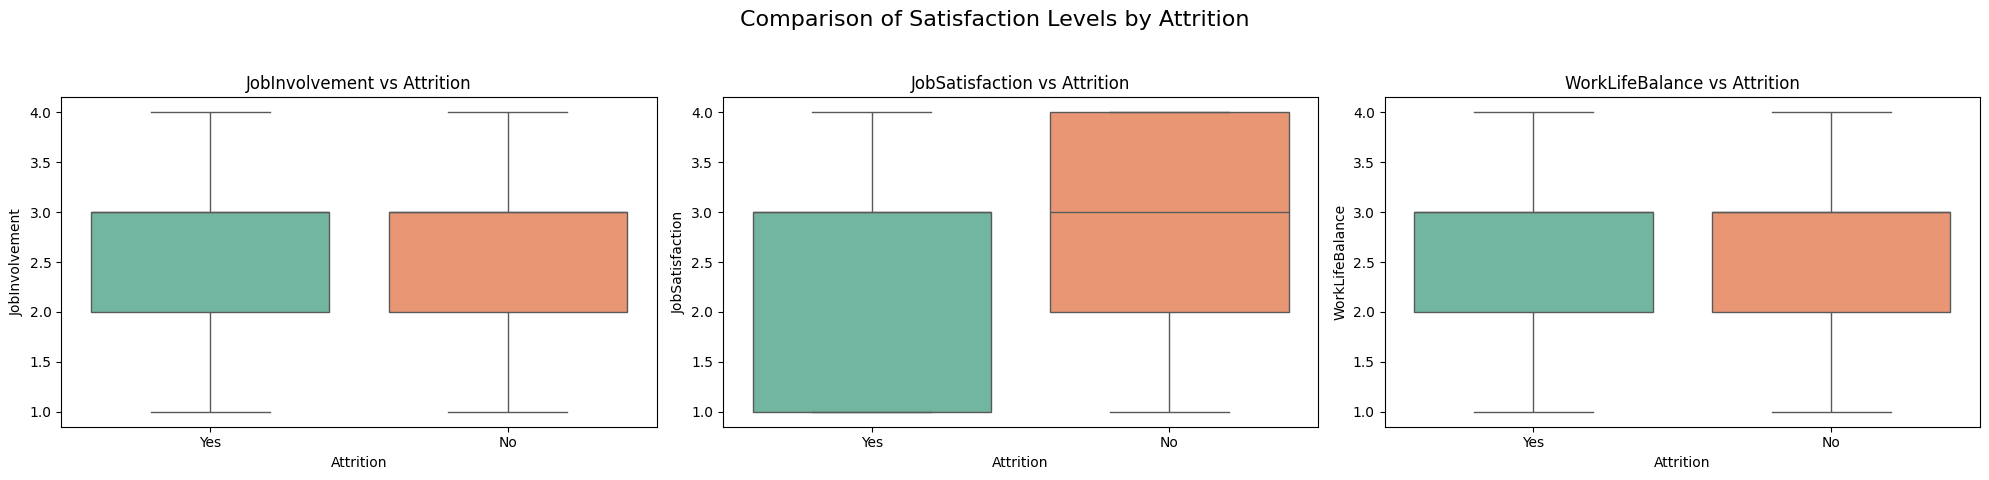

,JobInvolvement,JobSatisfaction,WorkLifeBalance
Attrition,,,
No,2.770479,2.778589,2.781022
Yes,2.518987,2.468354,2.658228


In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle("Comparison of Satisfaction Levels by Attrition", fontsize=16)
for i, factor in enumerate(satisfaction_factors):

    sns.boxplot(data=data1, x='Attrition', y=factor, ax=axs[i], palette="Set2")

    axs[i].set_title(f"{factor} vs Attrition")

    axs[i].set_xlabel("Attrition")

    axs[i].set_ylabel(factor)



plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
satisfaction_summary = data1.groupby('Attrition')[satisfaction_factors].mean()

satisfaction_summary

In [19]:
salary_factors = ['MonthlyIncome', 'PercentSalaryHike']
benefit_factors = ['StockOptionLevel']
factors = salary_factors + benefit_factors

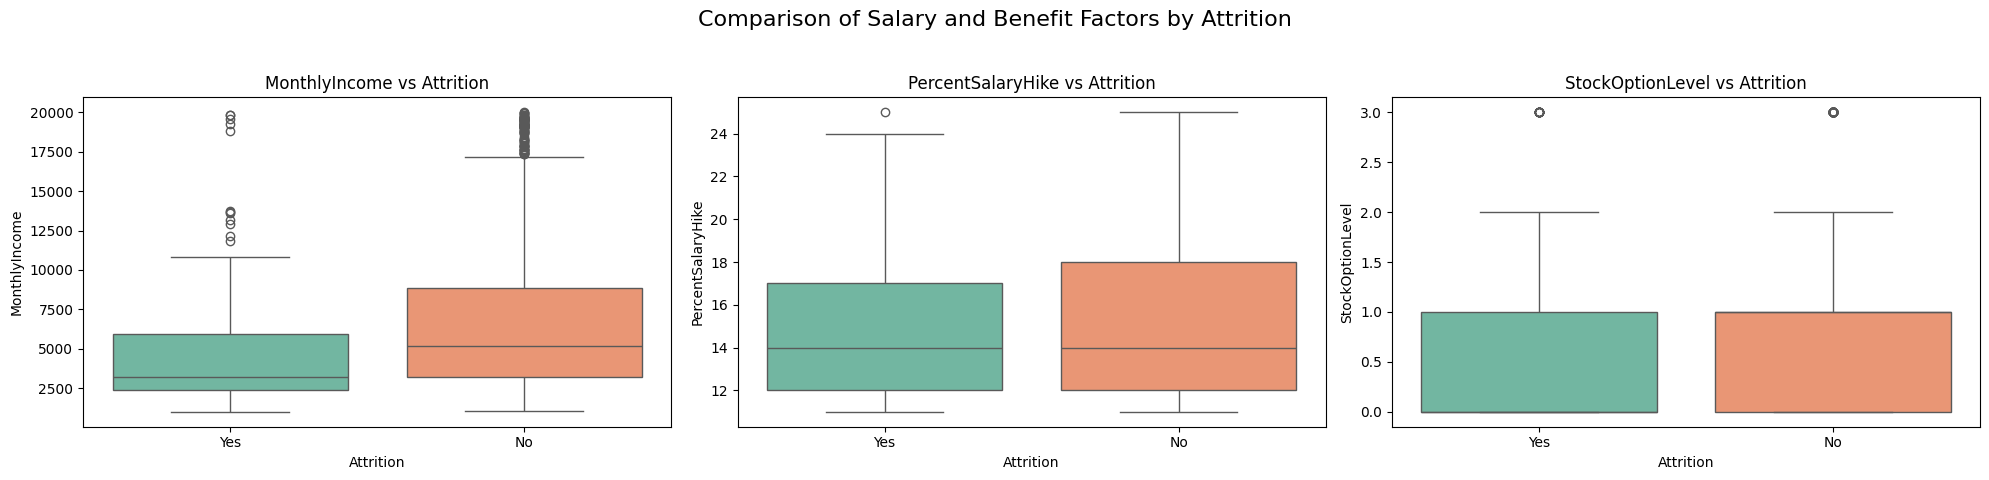

           MonthlyIncome  PercentSalaryHike  StockOptionLevel
Attrition                                                    
No           6832.739659          15.231144          0.845093
Yes          4787.092827          15.097046          0.527426


In [25]:
fig, axs = plt.subplots(1, len(factors), figsize=(20, 5))
fig.suptitle("Comparison of Salary and Benefit Factors by Attrition", fontsize=16)

for i, factor in enumerate(factors):
    sns.boxplot(data=data1, x='Attrition', y=factor, ax=axs[i], palette="Set2")
    axs[i].set_title(f"{factor} vs Attrition")
    axs[i].set_xlabel("Attrition")
    axs[i].set_ylabel(factor)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

salary_benefit_summary = data1.groupby('Attrition')[factors].mean()
print(salary_benefit_summary)